In [127]:
import glob
from astropy.io import ascii, fits
from subprocess import check_output
import matplotlib as mpl
import pylab
import numpy
%matplotlib inline

In [138]:
files = glob.glob("/gpfs/slac/lsst/fs3/g/data/R_and_D/ts8/20200629/ogP3/n*/sflat_flat_500_H*/*_R22_S00.fits")

results = {}
for afile in files:
    fh = fits.open(afile)
    ogp = fh["REB_COND"].header["OGP"]
    astat = check_output("/gpfs/slac/lsst/fs2/u1/devel/marshall/mutils/bin/imstat.py --quick {}".format(afile),shell=True)
    table = ascii.read(str(astat).split("\\n")[2:])
    results.update(
        {
            afile: {
            "ogp"    : ogp,
            "header" : fh["REB_COND"].header,
            "stat"   : table
            }
        }
    )

In [ ]:
results[]

Text(0, 0.5, 's-cte')

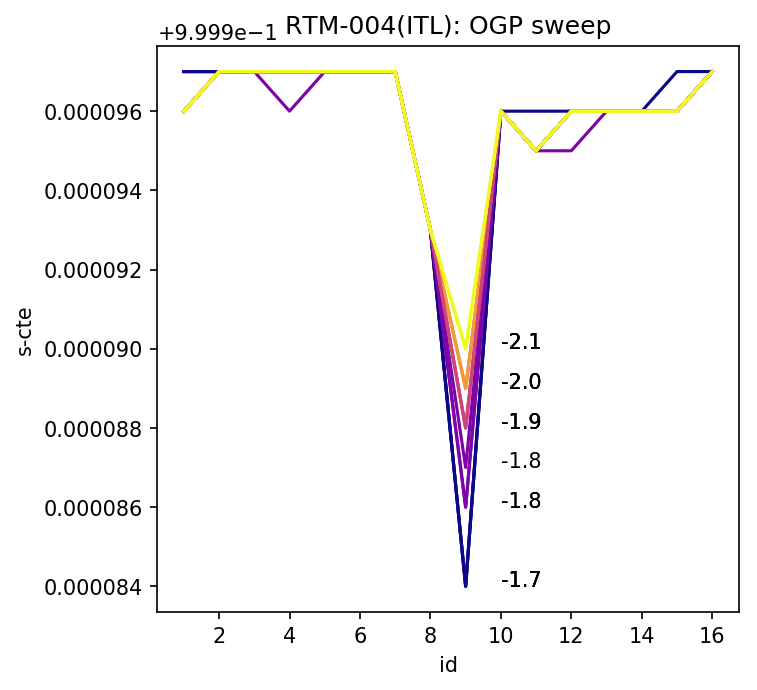

In [139]:
pylab.subplots(1,1,figsize=(5,5),dpi=150)
for afile in results:
    aresult = results[afile]
    x=aresult["stat"]["id"]
    y=aresult["stat"]["s-cte"]
    ogp = aresult["ogp"]
    pylab.plot(x,y,label=ogp,color=mpl.cm.plasma(-(ogp+1.7)/0.4))
    mnid = numpy.argmin(y)
    pylab.annotate(ogp,(x[mnid]+1,y[mnid]))
pylab.title("RTM-004(ITL): OGP sweep")
pylab.xlabel("id")
pylab.ylabel("s-cte")

In [ ]:
pylab.subplots(1,1,figsize=(5,5),dpi=150)
for afile in results:
    aresult = results[afile]
    x=aresult["stat"]["id"]
    y=aresult["stat"]["s-cte"]
    ogp = aresult["ogp"]
    pylab.plot(x,y,label=ogp,color=mpl.cm.plasma(-(ogp+1.7)/0.4))
    mnid = numpy.argmin(y)
    pylab.annotate(ogp,(x[mnid]+1,y[mnid]))
pylab.title("RTM-004(ITL): OGP sweep")
pylab.xlabel("id")
pylab.ylabel("s-cte")